In [10]:
library(readr)
que500 <- read.csv("M:\\Imarticus\\data sets\\Text mining\\500_questions.csv" , header = TRUE,
                   stringsAsFactors = FALSE,
                   strip.white = TRUE ,
                   sep = ',')

In [11]:
library("tm")
library("SnowballC")
library("wordcloud")
library("RColorBrewer")


docs <- Corpus(VectorSource(que500))

In [12]:
toSpace <- content_transformer(function (x , pattern ) gsub(pattern, " ", x))
docs <- tm_map(docs, toSpace, "/")
docs <- tm_map(docs, toSpace, "@")
docs <- tm_map(docs, toSpace, "\\|")                              

Warning message in tm_map.SimpleCorpus(docs, toSpace, "/"):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(docs, toSpace, "@"):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(docs, toSpace, "\\|"):
"transformation drops documents"

In [13]:

# Convert the text to lower case
docs <- tm_map(docs, content_transformer(tolower))
# Remove numbers
docs <- tm_map(docs, removeNumbers)
# Remove english common stopwords
docs <- tm_map(docs, removeWords, stopwords("english"))
# Remove your own stop word
docs <- tm_map(docs, removeWords,c("can","one","ddl","want","like","will","etc","also")) 
# Remove punctuations
docs <- tm_map(docs, removePunctuation)
# Eliminate extra white spaces
docs <- tm_map(docs, stripWhitespace)


Warning message in tm_map.SimpleCorpus(docs, content_transformer(tolower)):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(docs, removeNumbers):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(docs, removeWords, stopwords("english")):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(docs, removeWords, c("can", "one", "ddl", :
"transformation drops documents"Warning message in tm_map.SimpleCorpus(docs, removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(docs, stripWhitespace):
"transformation drops documents"

In [14]:
dtm <- TermDocumentMatrix(docs)
matrix <- as.matrix(dtm)
sorted_sum <- sort(rowSums(matrix),decreasing=TRUE)
table <- data.frame(word = names(sorted_sum ),freq=sorted_sum )

#4 meaningfull words
head(table,4)

#top 20 words
head(table,20)

,word,freq
sql,sql,142
key,key,119
object,object,84
questions,questions,73


,word,freq
sql,sql,142
key,key,119
object,object,84
questions,questions,73
data,data,63
asked,asked,59
class,class,52
server,server,52
database,database,51
table,table,50


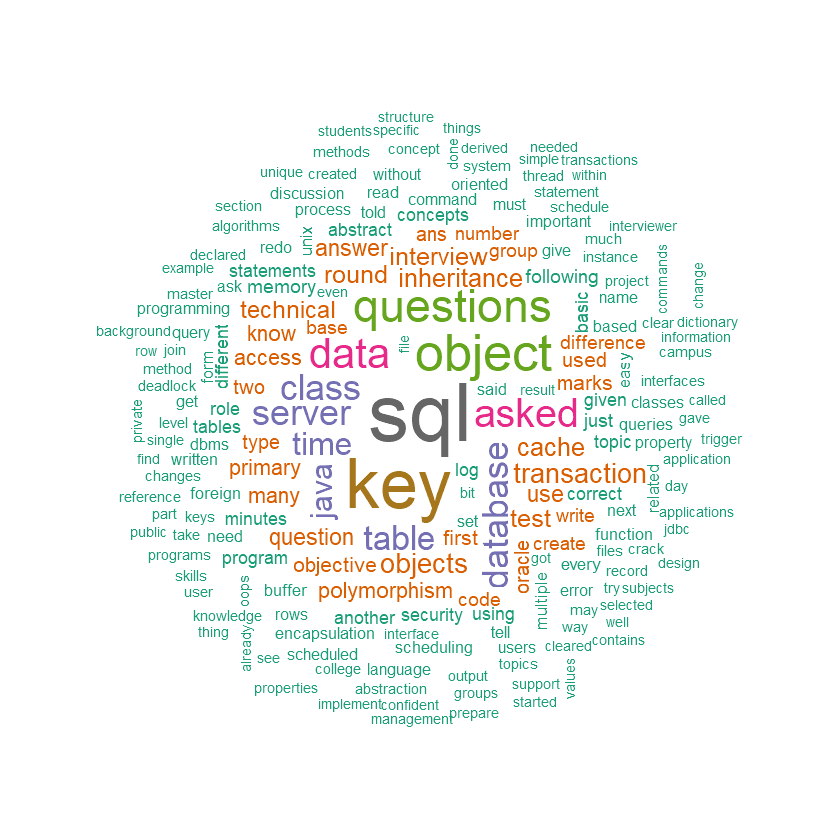

In [15]:
#word cloud
set.seed(1234)
wordcloud(words = table$word, freq = table$freq, min.freq = 1,
          max.words=200, random.order=FALSE, 
          colors=brewer.pal(8, "Dark2"))
